In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('Downloads/digit/train.csv')

In [3]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
df_train['label'].head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [6]:
X= df_train.drop('label',axis= True)

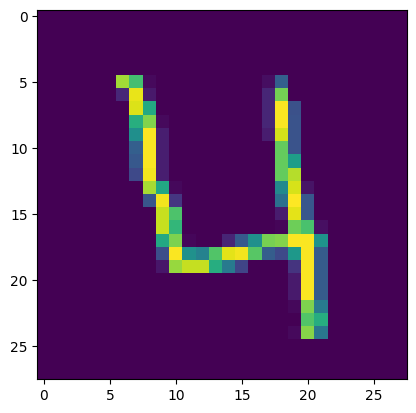

In [49]:
img = X.iloc[3].values.reshape(28,28)
plt.imshow(img)

In [8]:
X.shape

(42000, 784)

In [9]:
y= df_train['label']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=19)

In [11]:
X.iloc[0].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [12]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [13]:
x_train_scaled.shape

(33600, 784)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train_cat = to_categorical(y_train,num_classes=10)
y_test_cat = to_categorical(y_test,num_classes=10)

In [16]:
y_train_cat.shape

(33600, 10)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(30, activation='relu',input_shape=(784,)))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
 hist_1=model.fit(x_train_scaled,y_train_cat,epochs=10,batch_size=64) # minibatch  GD

Epoch 1/10
525/525 [==============================] - 1s 1ms/step - loss: 0.1821 - accuracy: 0.9744
Epoch 2/10
525/525 [==============================] - 1s 1ms/step - loss: 0.1490 - accuracy: 0.9763
Epoch 3/10
525/525 [==============================] - 1s 1ms/step - loss: 0.1277 - accuracy: 0.9773
Epoch 4/10
525/525 [==============================] - 1s 1ms/step - loss: 0.1112 - accuracy: 0.9796
Epoch 5/10
525/525 [==============================] - 1s 1ms/step - loss: 0.0970 - accuracy: 0.9802
Epoch 6/10
525/525 [==============================] - 1s 1ms/step - loss: 0.0895 - accuracy: 0.9814
Epoch 7/10
525/525 [==============================] - 1s 1ms/step - loss: 0.0800 - accuracy: 0.9834
Epoch 8/10
525/525 [==============================] - 1s 1ms/step - loss: 0.0725 - accuracy: 0.9843
Epoch 9/10
525/525 [==============================] - 1s 1ms/step - loss: 0.0664 - accuracy: 0.9843
Epoch 10/10
525/525 [==============================] - 1s 1ms/step - loss: 0.0593 - accuracy: 0.9864

In [50]:
import os

In [51]:
import cv2

In [52]:
def predict(path):
    A = cv2.imread(path,0)
    A = cv2.resize(A,(28,28))
    A = A.reshape(1,784)/255
    return model.predict_on_batch(A).argmax()

In [53]:
predict('Downloads/digit data/1.jpg')

1

In [54]:
predict('Downloads/digit data/2.jpg')

2

In [55]:
predict('Downloads/digit data/3.jpg')

3

In [56]:
predict('Downloads/digit data/5.jpg')

5

In [57]:
predict('Downloads/digit data/6.jpg')

5

In [58]:
predict('Downloads/digit data/7.jpg')

7

In [47]:
hist_2=model.fit(x_train_scaled,y_train_cat,epochs=10,batch_size=1) # stochastic GD

Epoch 1/10
33600/33600 [==============================] - 30s 900us/step - loss: 0.1449 - accuracy: 0.9738
Epoch 2/10
33600/33600 [==============================] - 29s 861us/step - loss: 0.1678 - accuracy: 0.9741
Epoch 3/10
33600/33600 [==============================] - 28s 838us/step - loss: 0.1850 - accuracy: 0.9732
Epoch 4/10
33600/33600 [==============================] - 28s 845us/step - loss: 0.2046 - accuracy: 0.9722
Epoch 5/10
33600/33600 [==============================] - 29s 858us/step - loss: 0.2140 - accuracy: 0.9721
Epoch 6/10
33600/33600 [==============================] - 29s 853us/step - loss: 0.2150 - accuracy: 0.9735
Epoch 7/10
33600/33600 [==============================] - 29s 855us/step - loss: 0.2230 - accuracy: 0.9725
Epoch 8/10
33600/33600 [==============================] - 29s 850us/step - loss: 0.2409 - accuracy: 0.9724
Epoch 9/10
33600/33600 [==============================] - 28s 843us/step - loss: 0.2432 - accuracy: 0.9730
Epoch 10/10
33600/33600 [============

In [59]:
hist_3 = model.fit(x_train_scaled,y_train_cat,epochs=10,batch_size=33600)

Epoch 1/10
1/1 [==============================] - 0s 331ms/step - loss: 0.2277 - accuracy: 0.9752
Epoch 2/10
1/1 [==============================] - 0s 102ms/step - loss: 0.2022 - accuracy: 0.9778
Epoch 3/10
1/1 [==============================] - 0s 100ms/step - loss: 0.1910 - accuracy: 0.9793
Epoch 4/10
1/1 [==============================] - 0s 82ms/step - loss: 0.1840 - accuracy: 0.9798
Epoch 5/10
1/1 [==============================] - 0s 72ms/step - loss: 0.1788 - accuracy: 0.9799
Epoch 6/10
1/1 [==============================] - 0s 74ms/step - loss: 0.1749 - accuracy: 0.9807
Epoch 7/10
1/1 [==============================] - 0s 86ms/step - loss: 0.1717 - accuracy: 0.9809
Epoch 8/10
1/1 [==============================] - 0s 78ms/step - loss: 0.1689 - accuracy: 0.9810
Epoch 9/10
1/1 [==============================] - 0s 69ms/step - loss: 0.1665 - accuracy: 0.9812
Epoch 10/10
1/1 [==============================] - 0s 75ms/step - loss: 0.1642 - accuracy: 0.9813


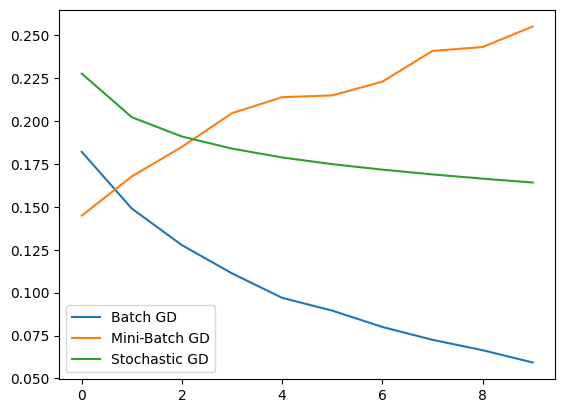

In [61]:
plt.plot(hist_1.history['loss'], label='Batch GD')
plt.plot(hist_2.history['loss'], label='Mini-Batch GD')
plt.plot(hist_3.history['loss'], label='Stochastic GD')
plt.legend()